# Processing

In [398]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

# import data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
%config InlineBackend.figure_formats = ['svg']
sns.set(context='notebook', style='whitegrid')

#https://www.kaggle.com/chethan187/ensemble-techniques

import warnings
warnings.filterwarnings('ignore')

# import data modelling libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [399]:
df = pd.read_csv('data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38205 entries, 0 to 38204
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38205 non-null  int64  
 1   job             38205 non-null  int64  
 2   marital         38205 non-null  int64  
 3   education       38205 non-null  int64  
 4   default         38205 non-null  int64  
 5   housing         38205 non-null  int64  
 6   loan            38205 non-null  int64  
 7   contact         38205 non-null  int64  
 8   month           38205 non-null  int64  
 9   day_of_week     38205 non-null  int64  
 10  duration        38205 non-null  int64  
 11  campaign        38205 non-null  int64  
 12  pdays           38205 non-null  int64  
 13  previous        38205 non-null  int64  
 14  poutcome        38205 non-null  int64  
 15  emp.var.rate    38205 non-null  float64
 16  cons.price.idx  38205 non-null  float64
 17  cons.conf.idx   38205 non-null 

#### Split Data Into Train and Test

In [401]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set

df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [402]:
df_train.shape, df_test.shape

((30564, 21), (7641, 21))

#### Dividing into X and Y sets for the model building

In [403]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [404]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [405]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30564, 20), (30564,), (7641, 20), (7641,))

# Modeling

## Base Model: Logistic Regression

In [471]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#Our data is not normally distributed so we will use StandardScaler for rescaling the continuous variables
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logit_model = LogisticRegression()
LG_model = logit_model.fit(X_train, y_train)

logit_predict = logit_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, LG_model.predict_proba(X_test)[:,1])

print("Confusion Matrix: \n\n", 
      confusion_matrix(y_test, logit_predict))

print("Classification Report for Logistic Regression: \n\n", 
      classification_report(y_test, logit_predict))                                                     

LogitRegression = (cross_val_score(logit_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Confusion Matrix: 

 [[6635  181]
 [ 487  338]]
Classification Report for Logistic Regression: 

               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6816
           1       0.65      0.41      0.50       825

    accuracy                           0.91      7641
   macro avg       0.79      0.69      0.73      7641
weighted avg       0.90      0.91      0.90      7641



In [470]:
from sklearn.metrics import log_loss
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, LG_model.predict_proba(X_test))))


Log-loss on logit: 0.2110


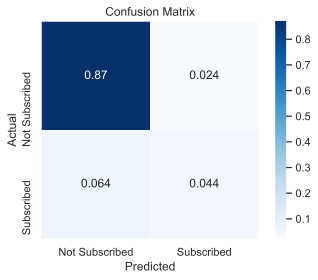

In [408]:
def plot_cm(y_true, y_pred, figsize=(8,6)):
    cm = confusion_matrix(y_test, logit_predict, normalize='all')

    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
plot_cm(y_test, logit_predict)
#plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Classification_Student-main/Bank Marketing Project/Data Project/bank-additional/confussion_matrix_log_pred.png')

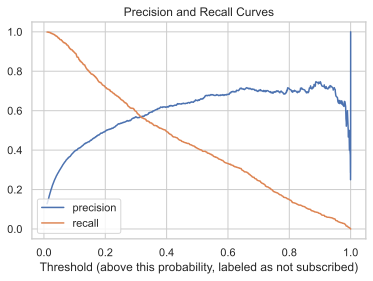

In [409]:
#precision/recall graph LG_model

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, LG_model.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, labeled as not subscribed)');
plt.title('Precision and Recall Curves');

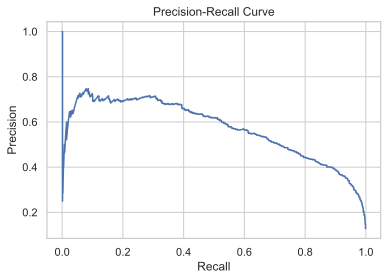

In [410]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

Logistic Regression Model best F1 score 0.594 at prob decision threshold >= 0.243


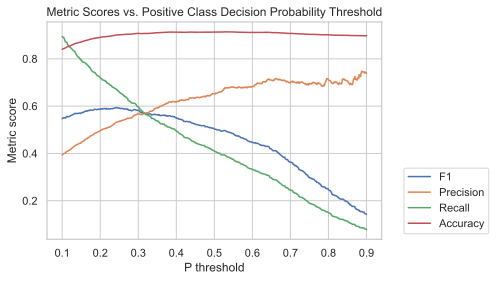

In [484]:
plt.figure(dpi=80)

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.9,1000)
model_val_probs = LG_model.predict_proba(X_val)[:,1]# positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

LG_best_f1_score = np.max(f1_scores) 
LG_best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (LG_best_f1_score, LG_best_thresh_p))
plt.savefig('charts/logit_metric_scores.png', bbox_inches='tight')

## Logistic Regression (weigh balanced class)

In [412]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#Our data is not normally distributed so we will use StandardScaler for rescaling the continuous variables
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logit_model_bal = LogisticRegression(class_weight='balanced', solver='liblinear')
LG_model_bal = logit_model_bal.fit(X_train, y_train)

logit_predict_bal = logit_model_bal.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, LG_model_bal.predict_proba(X_test)[:,1])

print("Confusion Matrix: \n\n", 
      confusion_matrix(y_test, logit_predict_bal))

print("Classification Report for Logistic Regression (Class_Weight): \n\n",
      classification_report(y_test, logit_predict_bal))                                                     

LogitRegression_bal = (cross_val_score(logit_model_bal, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Confusion Matrix: 

 [[5822  994]
 [ 107  718]]
Classification Report for Logistic Regression (Class_Weight): 

               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6816
           1       0.42      0.87      0.57       825

    accuracy                           0.86      7641
   macro avg       0.70      0.86      0.74      7641
weighted avg       0.92      0.86      0.88      7641



In [413]:
# Log_loss is not recommended for balanced weight class models. Note that the result is greater than the non-weight balanced LG model. Closer to '0' is better

from sklearn.metrics import log_loss
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, LG_model_bal.predict_proba(X_test))))


Log-loss on logit: 0.3815


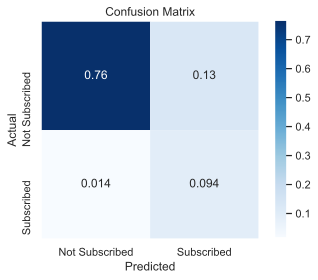

In [483]:
def plot_cm(y_true, y_pred, figsize=(8,6)):
    cm = confusion_matrix(y_test, logit_predict_bal, normalize='all')

    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
plot_cm(y_test, logit_predict_bal)
plt.savefig('charts/confussion_matrix_log_pred.png', bbox_inches='tight')


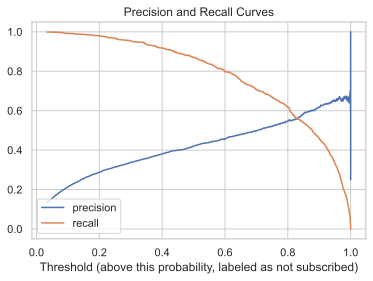

In [415]:
#precision/recall graph LG_model balanced

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, LG_model_bal.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, labeled as not subscribed)');
plt.title('Precision and Recall Curves');

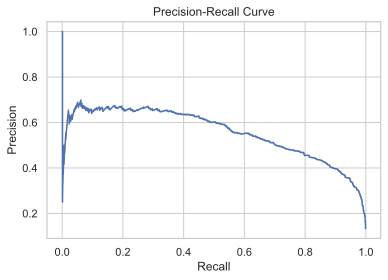

In [416]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

Notes on Results:
    
- F1 Score: improved by 34% with Logistic Regression (class_balance) 


Logistic Regression Model(weight balanced) best F1 score 0.590 at prob decision threshold >= 0.635


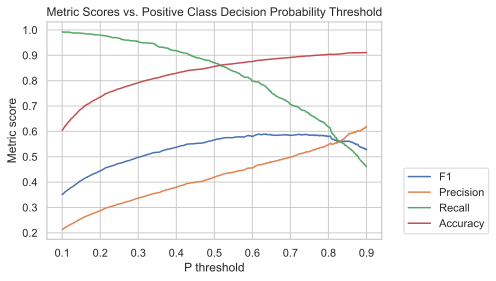

In [417]:
plt.figure(dpi=80)

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.9,1000)
model_val_probs = LG_model_bal.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

LG_balanced_best_f1_score = np.max(f1_scores) 
LG_balanced_best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model(weight balanced) best F1 score %.3f at prob decision threshold >= %.3f' 
      % (LG_balanced_best_f1_score, LG_balanced_best_thresh_p))

## Random Forest

In [488]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

rfcl_model = RandomForestClassifier()
RF_model = rfcl_model.fit(X_train, y_train)

rf_predict = rfcl_model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])

print("Confusion Matrix: \n\n", 
      confusion_matrix(y_test, rf_predict))

print("Classification Report for Random Forest: \n\n",
      classification_report(y_test, rf_predict))

RandomForest = (cross_val_score(rfcl_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Confusion Matrix: 

 [[6581  235]
 [ 389  436]]
Classification Report for Random Forest: 

               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6816
           1       0.65      0.53      0.58       825

    accuracy                           0.92      7641
   macro avg       0.80      0.75      0.77      7641
weighted avg       0.91      0.92      0.91      7641



Notes on Results:

- F1 Score is good but still lower than LG.

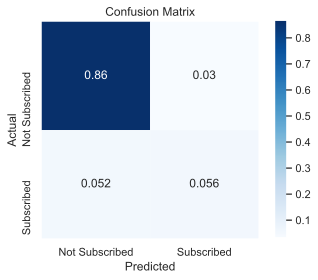

In [482]:
def plot_cm(y_true, y_pred, figsize=(8,6)):
    cm = confusion_matrix(y_test, rf_predict, normalize='all')

    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
plot_cm(y_test, rf_predict)
plt.savefig('charts/confussion_matrix_rf_predict.png', bbox_inches='tight')

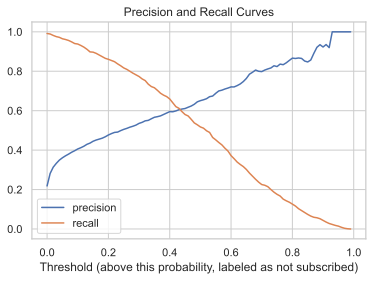

In [425]:
#precision/recall graph RF_model

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, RF_model.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, labeled as not subscribed)');
plt.title('Precision and Recall Curves');

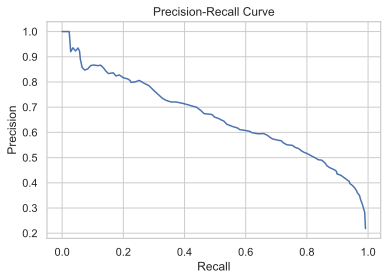

In [426]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

Random Forest Model best F1 score 0.639 at prob decision threshold >= 0.310


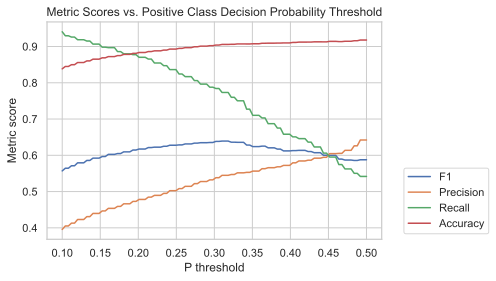

In [489]:
plt.figure(dpi=80)

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.5,100)
model_val_probs = RF_model.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

RF_best_f1_score = np.max(f1_scores) 
RF_best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Random Forest Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (RF_best_f1_score, RF_best_thresh_p))
plt.savefig('charts/RF_metric_scores.png', bbox_inches='tight')

### Compare performances of all the models

In [428]:
models = pd.DataFrame({'Models': ['LogitRegression', 'LogitRegression_bal', 'RandomForest'],
                       'F1 Scores': [LG_best_f1_score, LG_balanced_best_f1_score, RF_best_f1_score]})
models.sort_values(by='F1 Scores', ascending = False)

,Models,F1 Scores
2,RandomForest,0.634645
0,LogitRegression,0.594102
1,LogitRegression_bal,0.589802


#### Machine Learning models used:

1. Logistic Regression:

    A Supervised classification algorithm. It used Sigmoid function for classifying the binary labelled output variables.

2. Random Forest:

    A random forest is a meta estimator that fits a nummber of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Random Forest ROC AUC score =  0.9429902902262057


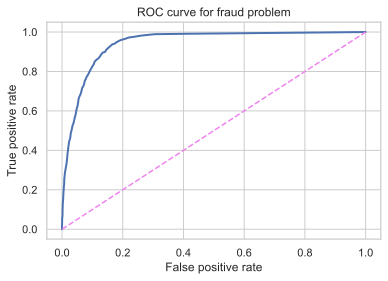

In [447]:
# RF Model

# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("Random Forest ROC AUC score = ", roc_auc_score(y_test, RF_model.predict_proba(X_test)[:,1]))

Logistic Regression ROC AUC score =  0.9289911438326931


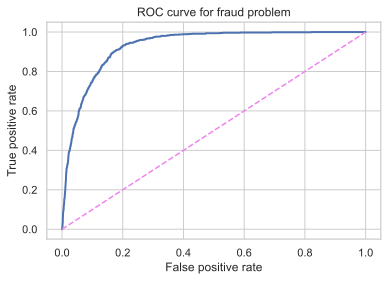

In [446]:
fpr, tpr, thresholds = roc_curve(y_test, LG_model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("Logistic Regression ROC AUC score = ", roc_auc_score(y_test, LG_model.predict_proba(X_test)[:,1]))

# Receiver Operating Characteristic (ROC) Comparison

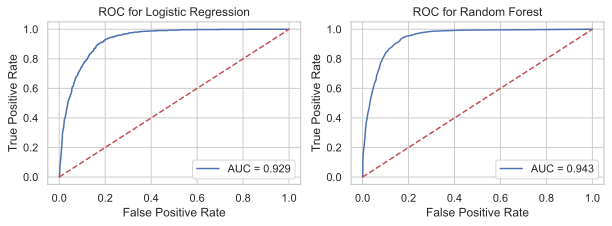

In [481]:
plt.figure(figsize=(10,3))

probs = logit_model.predict_proba(X_test)                            #ROC Curve for Logistic Regression
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(1,2,1)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC for Logistic Regression')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


probs = RF_model.predict_proba(X_test)                                 #ROC Curve for Random Forest 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC for Random Forest')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');
plt.savefig('charts/ROC_comparison.png', bbox_inches='tight')

## Log Loss Cross-Entropy

The cost function typically used for Gradient Descent on classification is log-loss-cross-entropy! 

Log loss is an essential metric that defines the numerical value bifurcation between the presumed probability label and the true one, expressing it in values between zero and one. 

>- Log-loss allows us to measure not just "did our model get XYZ right?" but "how confident was it when predicting?"
>- This function is mostly used to train binary classifiers, relatively simple tasks with two accurate and inaccurate labels. 
>- The lower the log loss, the more accurate predictions your AI will make, meaning its overall accuracy and functionality will rise. 

Without log loss, the artificial intelligence that enables many of our day-to-day activities wouldn’t make proper decisions, making it less than ideal for commercial applications. 


In [440]:
from sklearn.metrics import log_loss

In [458]:
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, LG_model.predict_proba(X_test))))
LG_log_loss = round(log_loss(y_test, LG_model.predict_proba(X_test)), 4)
LG_log_loss

Log-loss on logit: 0.2110


0.211

In [453]:
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, RF_model.predict_proba(X_test))))
RF_log_loss = round(log_loss(y_test, RF_model.predict_proba(X_test)), 4)
RF_log_loss

Log-loss on logit: 0.1998


0.1998

The Random Forest outperforms the Logistic here (since it's much smarter about its "how confident am I") despite not really outperforming the Logistic model much in accuracy.

## Log Loss performance comparison 

In [462]:
models = pd.DataFrame({'Models': ['LogitRegression', 'RandomForest'],
                       'Log Loss': [LG_log_loss, RF_log_loss]})
models.sort_values(by='Log Loss', ascending = True)           #closer to cero is better

,Models,Log Loss
1,RandomForest,0.1998
0,LogitRegression,0.2110


#### Conclusion:
    
- From all the above classification models, Random Forest performed better with F1 score of 0.63 with 7% better performance than the basic Logistic Regression model which scored an F1 of 0.59.

- Also, Area Under the Curve (AUC) for Random Forest scored 94.3% with 1.5% better performance than the Logistic basic model of 92.9% . 

- Accuracy scored well on training and test data so we had no issues of overfitting/underfitting.
 

In [475]:
logit_model = LogisticRegression()
LG_model = logit_model.fit(X_train, y_train)
print("The score for logit is")
print("Training: {:6.2f}%".format(100*LG_model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*LG_model.score(X_test, y_test)))

The score for logit is
Training:  91.01%
Test set:  91.26%


In [476]:
rfcl_model = RandomForestClassifier()
RF_model = rfcl_model.fit(X_train, y_train)
print("The score for RF is")
print("Training: {:6.2f}%".format(100*RF_model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*RF_model.score(X_test, y_test)))

The score for RF is
Training: 100.00%
Test set:  91.74%
